Trait Counts for CSV:
                   Count  Proportion
dama                 190    0.148322
criado               113    0.088212
galán                106    0.082748
criada                91    0.071038
viejo                 81    0.063232
...                  ...         ...
tío                    1    0.000781
san juan bautista      1    0.000781
lázaro llagado         1    0.000781
pobre                  1    0.000781
segundo                1    0.000781

[138 rows x 2 columns]

Trait Counts for Plot:
           Count  Proportion
dama         190    0.148322
criado       113    0.088212
galán        106    0.082748
criada        91    0.071038
viejo         81    0.063232
rey           65    0.050742
príncipe      54    0.042155
gracioso      41    0.032006
villano       32    0.024980
ninfa         29    0.022639
soldado       24    0.018735
reina         20    0.015613
villana       19    0.014832
hija          16    0.012490
enamorado     16    0.012490
capitán       16    0.

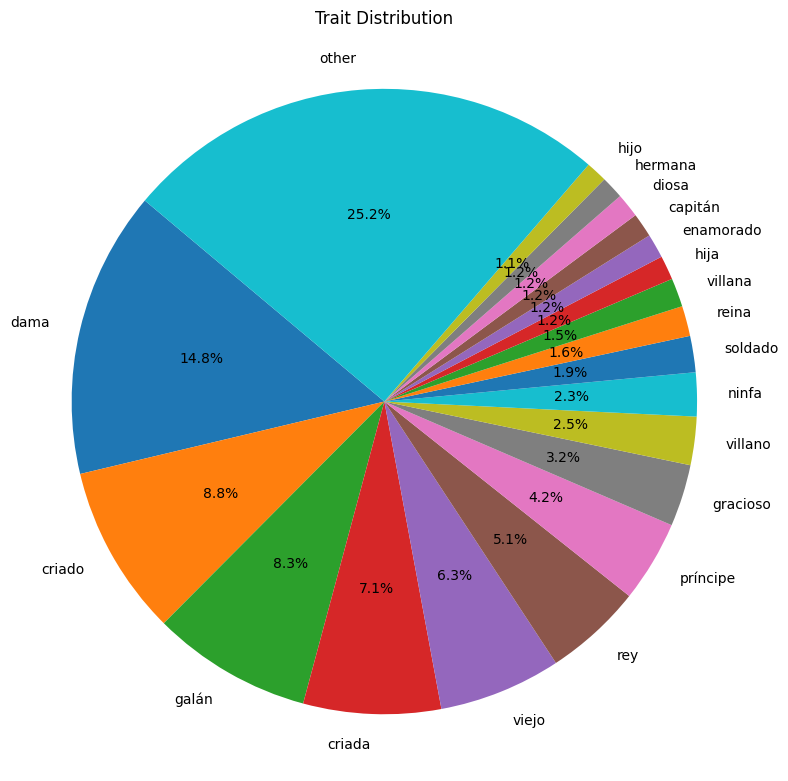

In [2]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Define function to parse XML files
def parse_xml(file_path):
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Initialize an empty list to store traits
    all_traits = []
    
    # Extract traits from tei:person elements
    for person in root.findall('.//tei:person', namespaces=namespaces):
        trait = person.findtext('tei:trait/tei:desc', namespaces=namespaces)
        if trait:
            all_traits.append(trait.lower())  # Convert trait to lowercase
    
    # Extract traits from tei:personGrp elements
    for person_grp in root.findall('.//tei:personGrp', namespaces=namespaces):
        trait = person_grp.findtext('tei:trait/tei:desc', namespaces=namespaces)
        if trait:
            all_traits.append(trait.lower())  # Convert trait to lowercase
    
    return all_traits

# Initialize counters
trait_counts = {}

# Iterate over each file in the "results" folder
results_folder = "results"
for filename in os.listdir(results_folder):
    if filename.endswith(".xml"):
        file_path = os.path.join(results_folder, filename)
        traits = parse_xml(file_path)
        
        # Count trait occurrences
        for trait in traits:
            trait_counts[trait] = trait_counts.get(trait, 0) + 1

# Convert counts to DataFrame
df = pd.DataFrame.from_dict(trait_counts, orient='index', columns=['Count'])

# Sort DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)

# Calculate proportions
df['Proportion'] = df['Count'] / df['Count'].sum()

# Save results to CSV without aggregating 'other'
output_folder = "output/csv"
os.makedirs(output_folder, exist_ok=True)
df.to_csv(os.path.join(output_folder, "trait_counts.csv"))

# Plot with aggregation for categories less than 1%
threshold = 0.01
df_plot = df.copy()
other_sum = df_plot[df_plot['Proportion'] < threshold]['Count'].sum()
df_plot = df_plot[df_plot['Proportion'] >= threshold]
df_plot.loc['other'] = other_sum

# Print summary
print("Trait Counts for CSV:")
print(df)
print("\nTrait Counts for Plot:")
print(df_plot)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_plot['Count'], labels=df_plot.index, autopct='%1.1f%%', startangle=140)
plt.title('Trait Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save plot as PNG
img_folder = "output/img"
os.makedirs(img_folder, exist_ok=True)
plt.savefig(os.path.join(img_folder, "trait_distribution.png"))

# Show plot
plt.show()
